In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

In [2]:
# Load metadata
metadata_path = 'dataset/ham10000_metadata.csv'
metadata = pd.read_csv(metadata_path)

In [3]:
# Display first few rows of the metadata
print(metadata.head())

        isic_id                                        attribution  \
0  ISIC_0024306  ViDIR Group, Department of Dermatology, Medica...   
1  ISIC_0024307  ViDIR Group, Department of Dermatology, Medica...   
2  ISIC_0024308  ViDIR Group, Department of Dermatology, Medica...   
3  ISIC_0024309  ViDIR Group, Department of Dermatology, Medica...   
4  ISIC_0024310  ViDIR Group, Department of Dermatology, Medica...   

  copyright_license  age_approx anatom_site_general benign_malignant  \
0          CC-BY-NC        45.0                 NaN           benign   
1          CC-BY-NC        50.0     lower extremity           benign   
2          CC-BY-NC        55.0                 NaN           benign   
3          CC-BY-NC        40.0                 NaN           benign   
4          CC-BY-NC        60.0      anterior torso        malignant   

   concomitant_biopsy diagnosis            diagnosis_confirm_type  \
0               False     nevus  serial imaging showing no change   
1       

In [5]:
# Check the distribution of the classes
print(metadata['diagnosis'].value_counts())

diagnosis
nevus                         7737
pigmented benign keratosis    1338
melanoma                      1305
basal cell carcinoma           622
squamous cell carcinoma        229
vascular lesion                180
dermatofibroma                 160
actinic keratosis              149
Name: count, dtype: int64


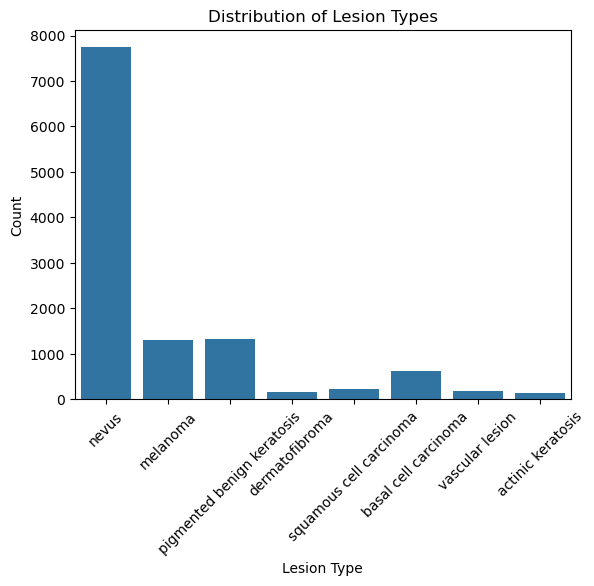

In [7]:
# Plot the distribution of the classes
sns.countplot(x='diagnosis', data=metadata)
plt.title('Distribution of Lesion Types')
plt.xlabel('Lesion Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

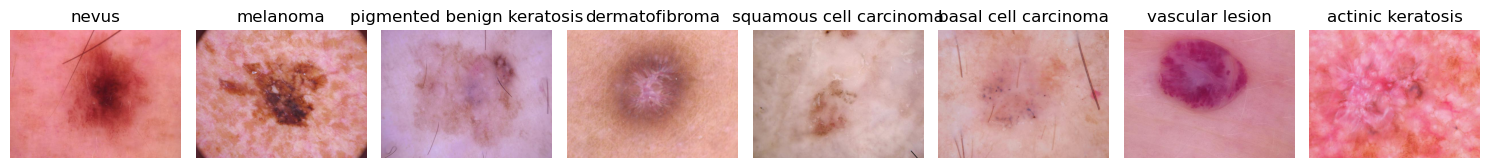

In [9]:
# Define the path to the images
image_dir = 'dataset/ham10000/'

# Plot sample images from each class
classes = metadata['diagnosis'].unique()
n_classes = len(classes)

plt.figure(figsize=(15, 15))

for i, c in enumerate(classes):
    # Get the first image from each class
    image_path = metadata[metadata['diagnosis'] == c]['isic_id'].iloc[0]
    img = Image.open(os.path.join(image_dir, image_path + '.jpg'))
    
    plt.subplot(1, n_classes, i + 1)
    plt.imshow(img)
    plt.title(c)
    plt.axis('off')

plt.tight_layout()
plt.show()


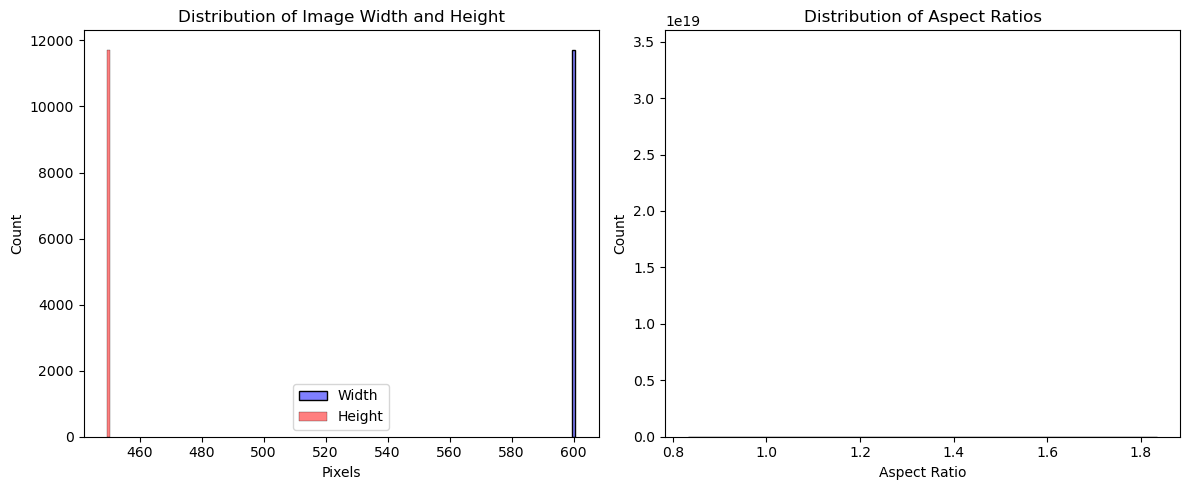

In [10]:
# Get the size of images
image_sizes = []
aspect_ratios = []

for isic_id in metadata['isic_id']:
    img = Image.open(os.path.join(image_dir, isic_id + '.jpg'))
    width, height = img.size
    image_sizes.append((width, height))
    aspect_ratios.append(width / height)

# Convert to DataFrame for easy analysis
image_sizes_df = pd.DataFrame(image_sizes, columns=['Width', 'Height'])
aspect_ratios_df = pd.Series(aspect_ratios, name='Aspect Ratio')

# Plot image size distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(image_sizes_df['Width'], kde=True, color='blue', label='Width')
sns.histplot(image_sizes_df['Height'], kde=True, color='red', label='Height')
plt.title('Distribution of Image Width and Height')
plt.xlabel('Pixels')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(aspect_ratios_df, kde=True)
plt.title('Distribution of Aspect Ratios')
plt.xlabel('Aspect Ratio')

plt.tight_layout()
plt.show()


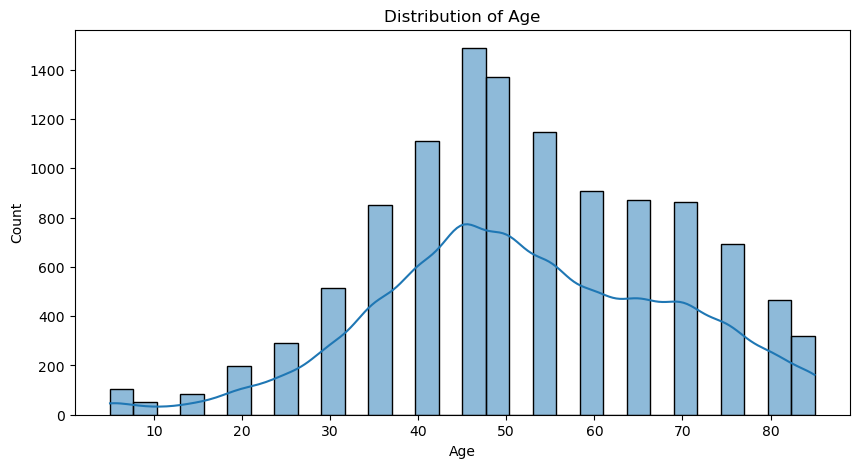

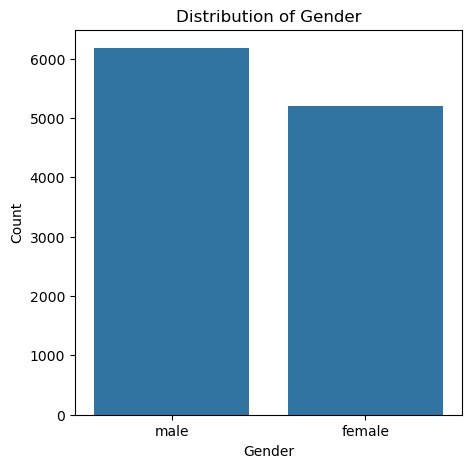

In [12]:
# Distribution of Age
plt.figure(figsize=(10, 5))
sns.histplot(metadata['age_approx'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Distribution of Gender
plt.figure(figsize=(5, 5))
sns.countplot(x='sex', data=metadata)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



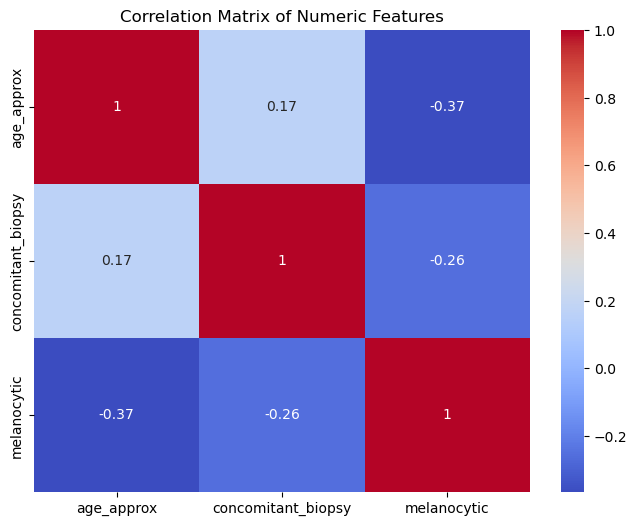

In [14]:
# Plot correlation matrix
metadata['age_approx'] = metadata['age_approx'].fillna(metadata['age_approx'].median())  # Fill NaN with median age
correlation_matrix = metadata.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


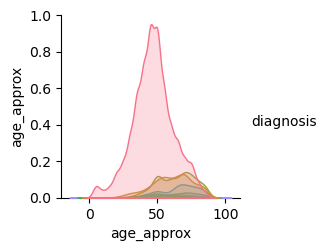

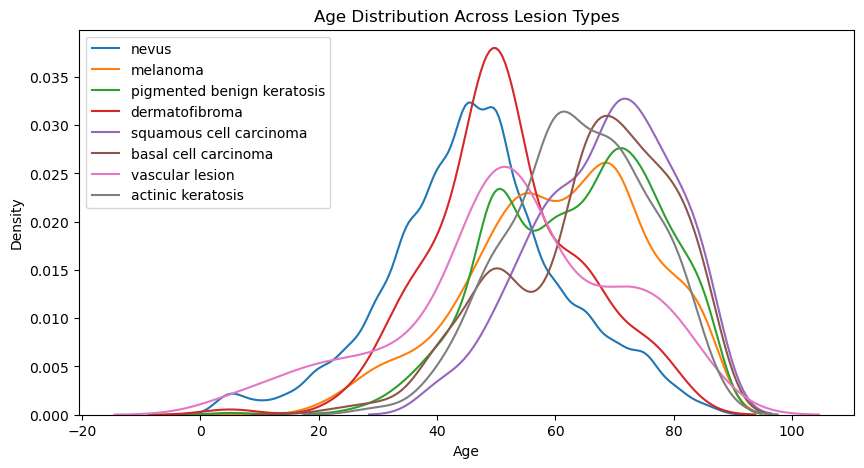

In [15]:
# Pairplot to explore relationships between features
sns.pairplot(metadata, hue='diagnosis', vars=['age_approx'], palette='husl')
plt.show()

# KDE plot for age distribution across different lesion types
plt.figure(figsize=(10, 5))
for dx_type in metadata['diagnosis'].unique():
    subset = metadata[metadata['diagnosis'] == dx_type]
    sns.kdeplot(subset['age_approx'], label=dx_type)

plt.title('Age Distribution Across Lesion Types')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()
